In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing normal distribution functions
from scipy.stats import norm 

In [2]:
spreadsheet = pd.read_csv("C:/Users/Elvys/Downloads/MSFT.csv")

In [3]:
 #
    spreadsheet.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-10,162.820007,163.220001,161.179993,161.339996,159.648727,20725900
1,2020-01-13,161.759995,163.309998,161.259995,163.279999,161.568405,21626500
2,2020-01-14,163.389999,163.600006,161.720001,162.130005,160.430450,23477400
3,2020-01-15,162.619995,163.940002,162.570007,163.179993,161.469452,21417900
4,2020-01-16,164.350006,166.240005,164.029999,166.169998,164.428116,23865400


In [4]:
# checking the shape of the data
spreadsheet.shape

(252, 7)

In [5]:
# inspecting the dataset
spreadsheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
# checking for missing values
spreadsheet.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# let's calculate log daily return for Microsoft data
spreadsheet['LogReturn'] = np.log(spreadsheet['Close'])-np.log(spreadsheet['Close']).shift(1)

In [8]:
spreadsheet['LogReturn']

0           NaN
1      0.011953
2     -0.007068
3      0.006455
4      0.018158
         ...   
247   -0.021495
248    0.000964
249   -0.026271
250    0.028060
251    0.006074
Name: LogReturn, Length: 252, dtype: float64

In [9]:
#mean
mu = spreadsheet['LogReturn'].mean()
#standard deviation
sigma = spreadsheet['LogReturn'].std(ddof=1)

In [10]:
spreadsheet['LogReturn']

0           NaN
1      0.011953
2     -0.007068
3      0.006455
4      0.018158
         ...   
247   -0.021495
248    0.000964
249   -0.026271
250    0.028060
251    0.006074
Name: LogReturn, Length: 252, dtype: float64

In [11]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 

density = pd.DataFrame()
density['x'] = np.arange(spreadsheet['LogReturn'].min(), spreadsheet['LogReturn'].max(), 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

sns.histplot(ms['LogReturn'], kde = True, stat = 'density')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

NameError: name 'ms' is not defined

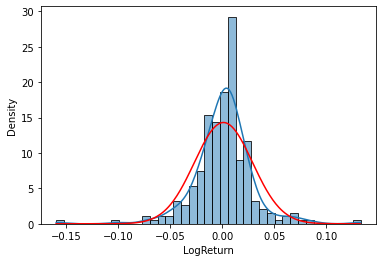

In [12]:
# Plot a histogram to show the distribution of log return of Microsoft's stock. 

density = pd.DataFrame()
density['x'] = np.arange(spreadsheet['LogReturn'].min(), spreadsheet['LogReturn'].max(), 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

sns.histplot(spreadsheet['LogReturn'], kde = True, stat = 'density')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [13]:
# We are to calculate P(X<=-0.05)
prob_drop5_day = norm.cdf(-0.05,loc=mu, scale=sigma)
print('The required probability that the stock price will drop over 5% in a day is '+ str(prob_drop5_day))

The required probability that the stock price will drop over 5% in a day is 0.033181437344865984


In [14]:
# calculating mean and standard deviation for yearly log-return
mu_yearly = mu * 250
sigma_yearly = sigma * np.sqrt(250) 
# We are to calculate P(X<=0.5)
prob_drop50_year=norm.cdf(-0.5, mu_yearly, sigma_yearly)
print('The probability that the stock price will drop over 50% in a year is '+ str(prob_drop50_year) )

The probability that the stock price will drop over 50% in a year is 0.03366022235185039


In [15]:
# We are to calculate P(X<=25)
prob_drop25_year=norm.cdf(-0.25, mu_yearly, sigma_yearly)
print('The probability that the stock price will drop over 25% in a year is '+ str(prob_drop25_year))

The probability that the stock price will drop over 25% in a year is 0.10331797034715662
